# FOREST COVER PREDICTION

LOAD DATASET


In [ ]:
import pandas as pd

filename = '/content/train.csv'
df = pd.read_csv(filename)

print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

1. No null values since we have all columns have 15120 non-null entries
2. The data types of the columns include int64 and float64, so no categorical variables are present in the data and data is numeric.
3. The dataset contains 15,120 rows and 56 columns.
4. Elevation, Aspect, Slope, Distance Features: key features
5. Soil Type & Wilderness Area: one hot encoded data
6. Cover Type (Target Variable)



In [ ]:
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


  - **Mean vs. Median:**  
    - The mean and median of features like **Elevation** are very similar (mean ~2749, median ~2752), indicating a roughly symmetric distribution.
  
  - **Standard Deviation:**  
    - For features like **Slope**, the standard deviation (8.45) shows moderate variability around the mean.
  
- **Range and Outliers:**
  - **Minimum and Maximum Values:**  
    - **Elevation** ranges from 1863 to 3849, showing the extent of elevation covered in the dataset.
    - **Cover_Type** ranges from 1 to 7, corresponding to the 7 different forest cover types.
  

  - **25th, 50th, and 75th Percentiles:**  
    - These percentiles help us see the distribution spread. For example, **Horizontal_Distance_To_Hydrology** is mostly concentrated between 10 and 22.
  
- **Binary Features (Soil and Wilderness):**
  - **Soil_Type and Wilderness_Area Columns:**  
    - Since these are binary (0 or 1), their mean values indicate the proportion of observations that have a particular feature present. For instance, a mean of ~0.045 for a soil type indicates that approximately 4.5% of observations have that soil type.


  - **Balanced vs. Imbalanced Data:**  
    - The spread of the target variable (**Cover_Type**) should be visualized next to understand if certain classes dominate. This can influence the choice of modeling techniques and handling of class imbalance.


In [ ]:
df.isnull().sum()

,0
Id,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0


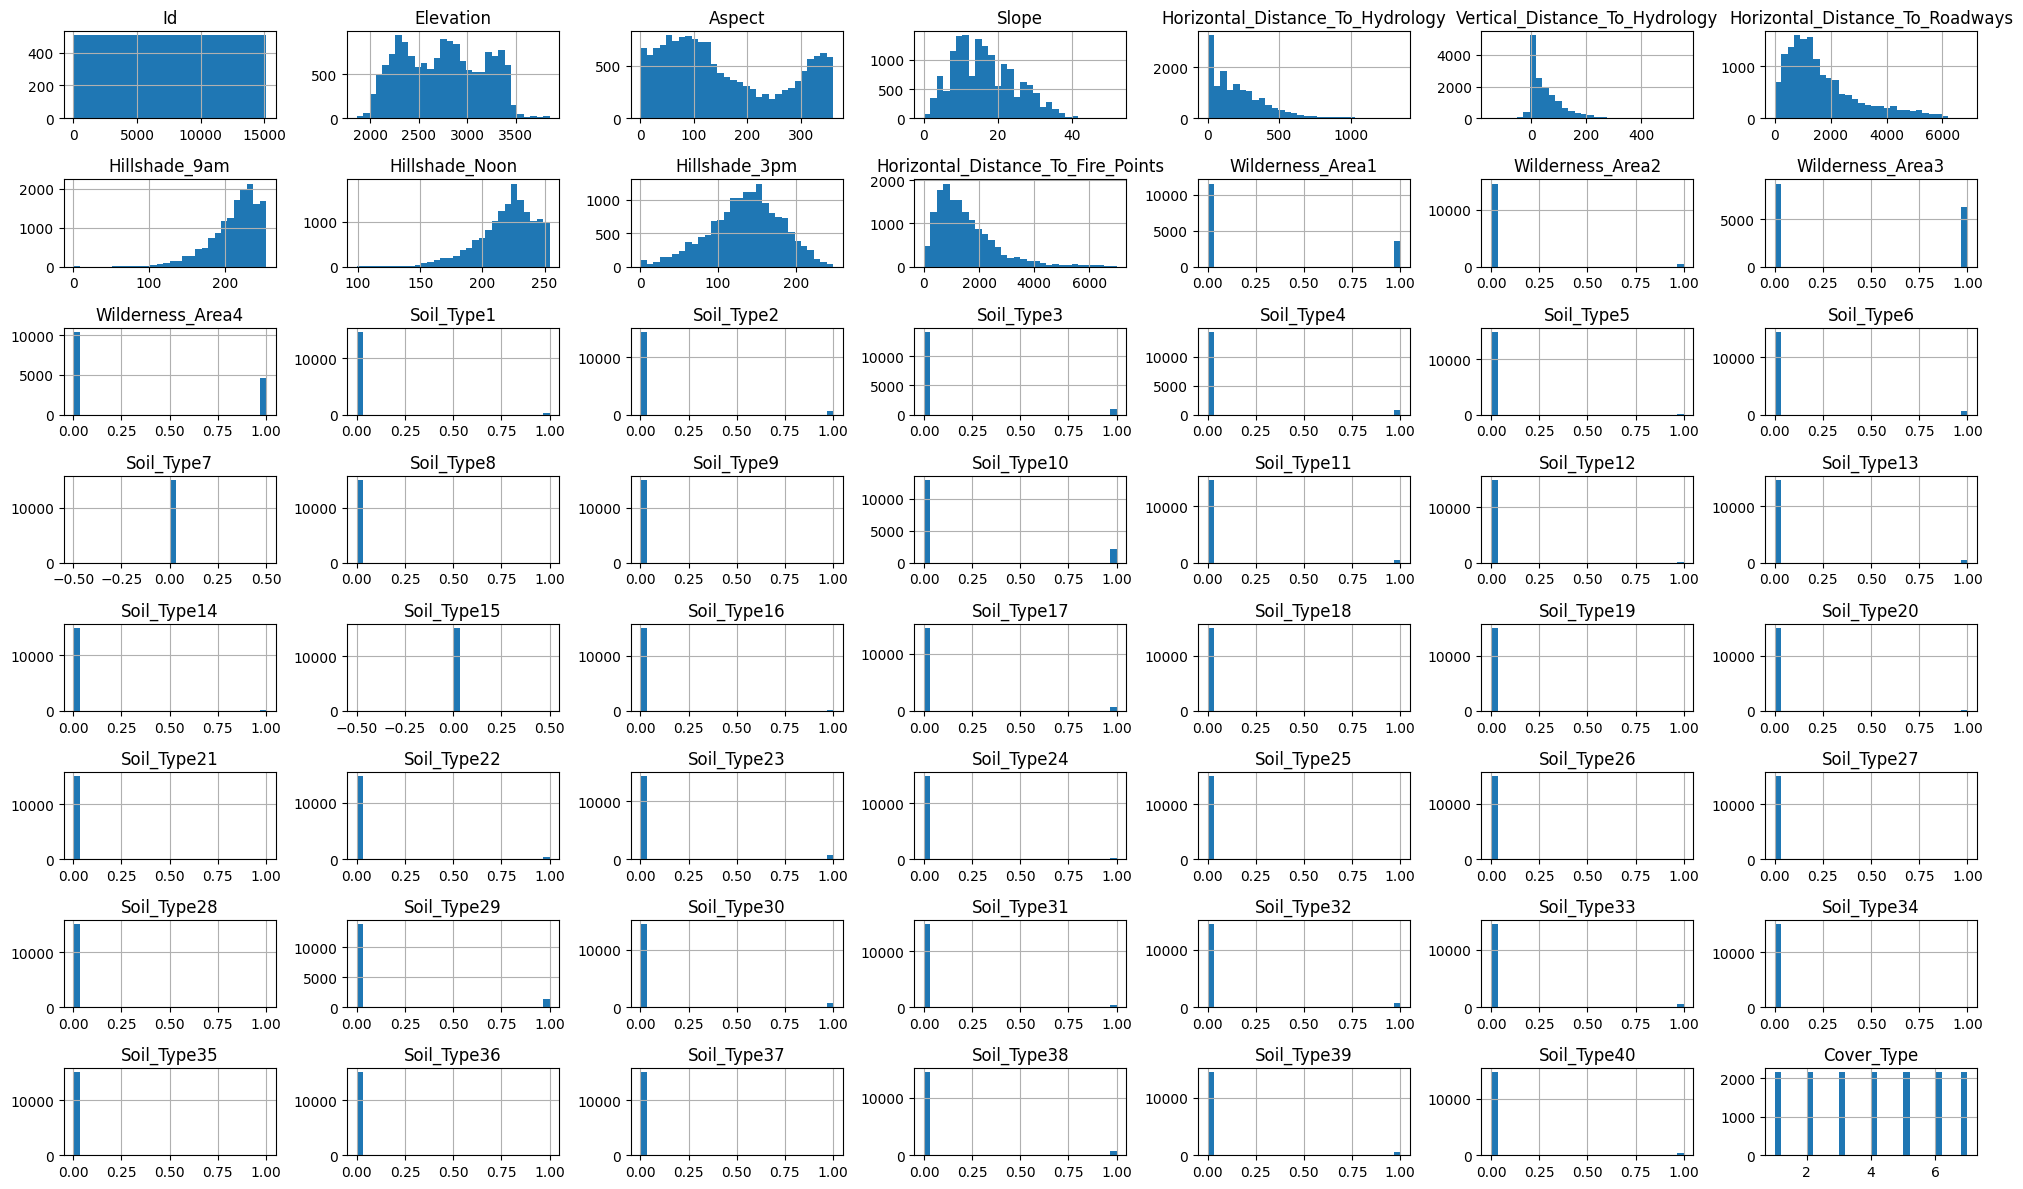

In [ ]:
import matplotlib.pyplot as plt

# Create histogram
df.hist(figsize=(20, 12), bins=30)  # Adjust bins if needed

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

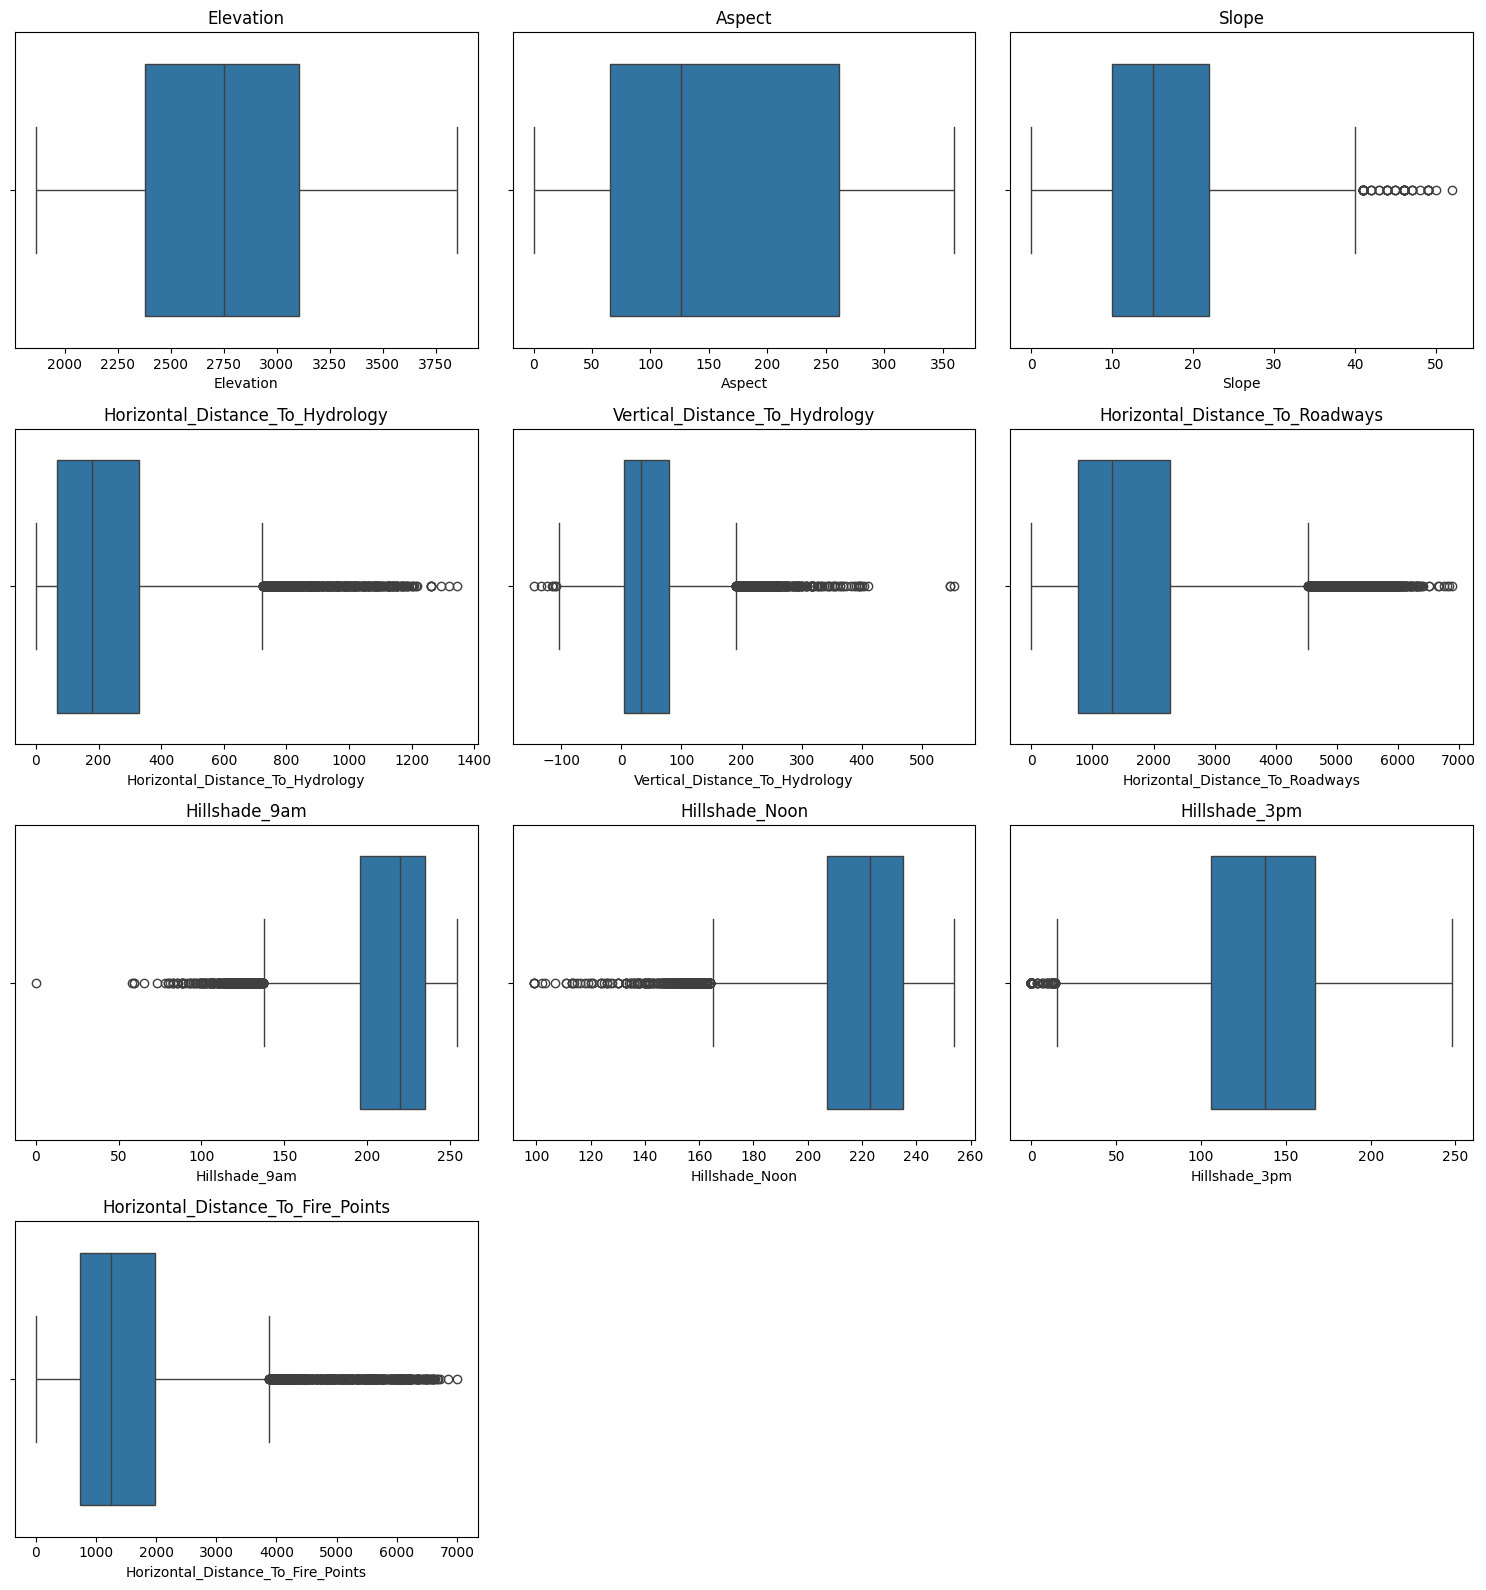

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous features to visualize
continuous_features = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Set the number of plots and configure the subplot grid
n_features = len(continuous_features)
cols = 3  # number of plots per row
rows = n_features // cols + (n_features % cols > 0)

plt.figure(figsize=(cols*5, rows*4))

for i, feature in enumerate(continuous_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()


* **Elevation**: the median is quite high
* **Aspect**: the median is more towards the center
*  **Slope**: a lower median and the outliers towards teh right side of the plot(higher side). Thus steeper slopes are less frequent and more of less sloped areas are common
* **Distance (Hydrology, Roadways, Fire Points)**:
they generallay have outliers towards teh higher side
* **Vertical Distance to Hydrology**:outliers are on bothe teh sides of the box, but largely on the higher side.
* **Hillshade features**: they have outliers towards the lesser sode , but largely depending upon the time. They are reducing as we move towards the end of the day.








log transformations

In [ ]:
import numpy as np
import pandas as pd

filename = '/content/train.csv'
df = pd.read_csv(filename)

# Create a copy of the DataFrame to store transformed features
df_log = df.copy()

# List of continuous features to transform
continuous_features = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Apply log transformation: new column name: feature + '_log'
for feature in continuous_features:
    # Adding 1 to avoid issues with log(0)
    df_log[feature + '_log'] = np.log(df_log[feature] + 1)

# Display the first few rows to confirm
df_log.head()


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Elevation_log,Aspect_log,Slope_log,Horizontal_Distance_To_Hydrology_log,Vertical_Distance_To_Hydrology_log,Horizontal_Distance_To_Roadways_log,Hillshade_9am_log,Hillshade_Noon_log,Hillshade_3pm_log,Horizontal_Distance_To_Fire_Points_log
0,1,2596,51,3,258,0,510,221,232,148,...,7.862112,3.951244,1.386294,5.556828,0.000000,6.236370,5.402677,5.451038,5.003946,8.745125
1,2,2590,56,2,212,-6,390,220,235,151,...,7.859799,4.043051,1.098612,5.361292,NaN,5.968708,5.398163,5.463832,5.023881,8.736489
2,3,2804,139,9,268,65,3180,234,238,135,...,7.939159,4.941642,2.302585,5.594711,4.189655,8.064951,5.459586,5.476464,4.912655,8.719644
3,4,2785,155,18,242,118,3090,238,238,122,...,7.932362,5.049856,2.944439,5.493061,4.779123,8.036250,5.476464,5.476464,4.812184,8.734238
4,5,2595,45,2,153,-1,391,220,234,150,...,7.861727,3.828641,1.098612,5.036953,-inf,5.971262,5.398163,5.459586,5.017280,8.727940


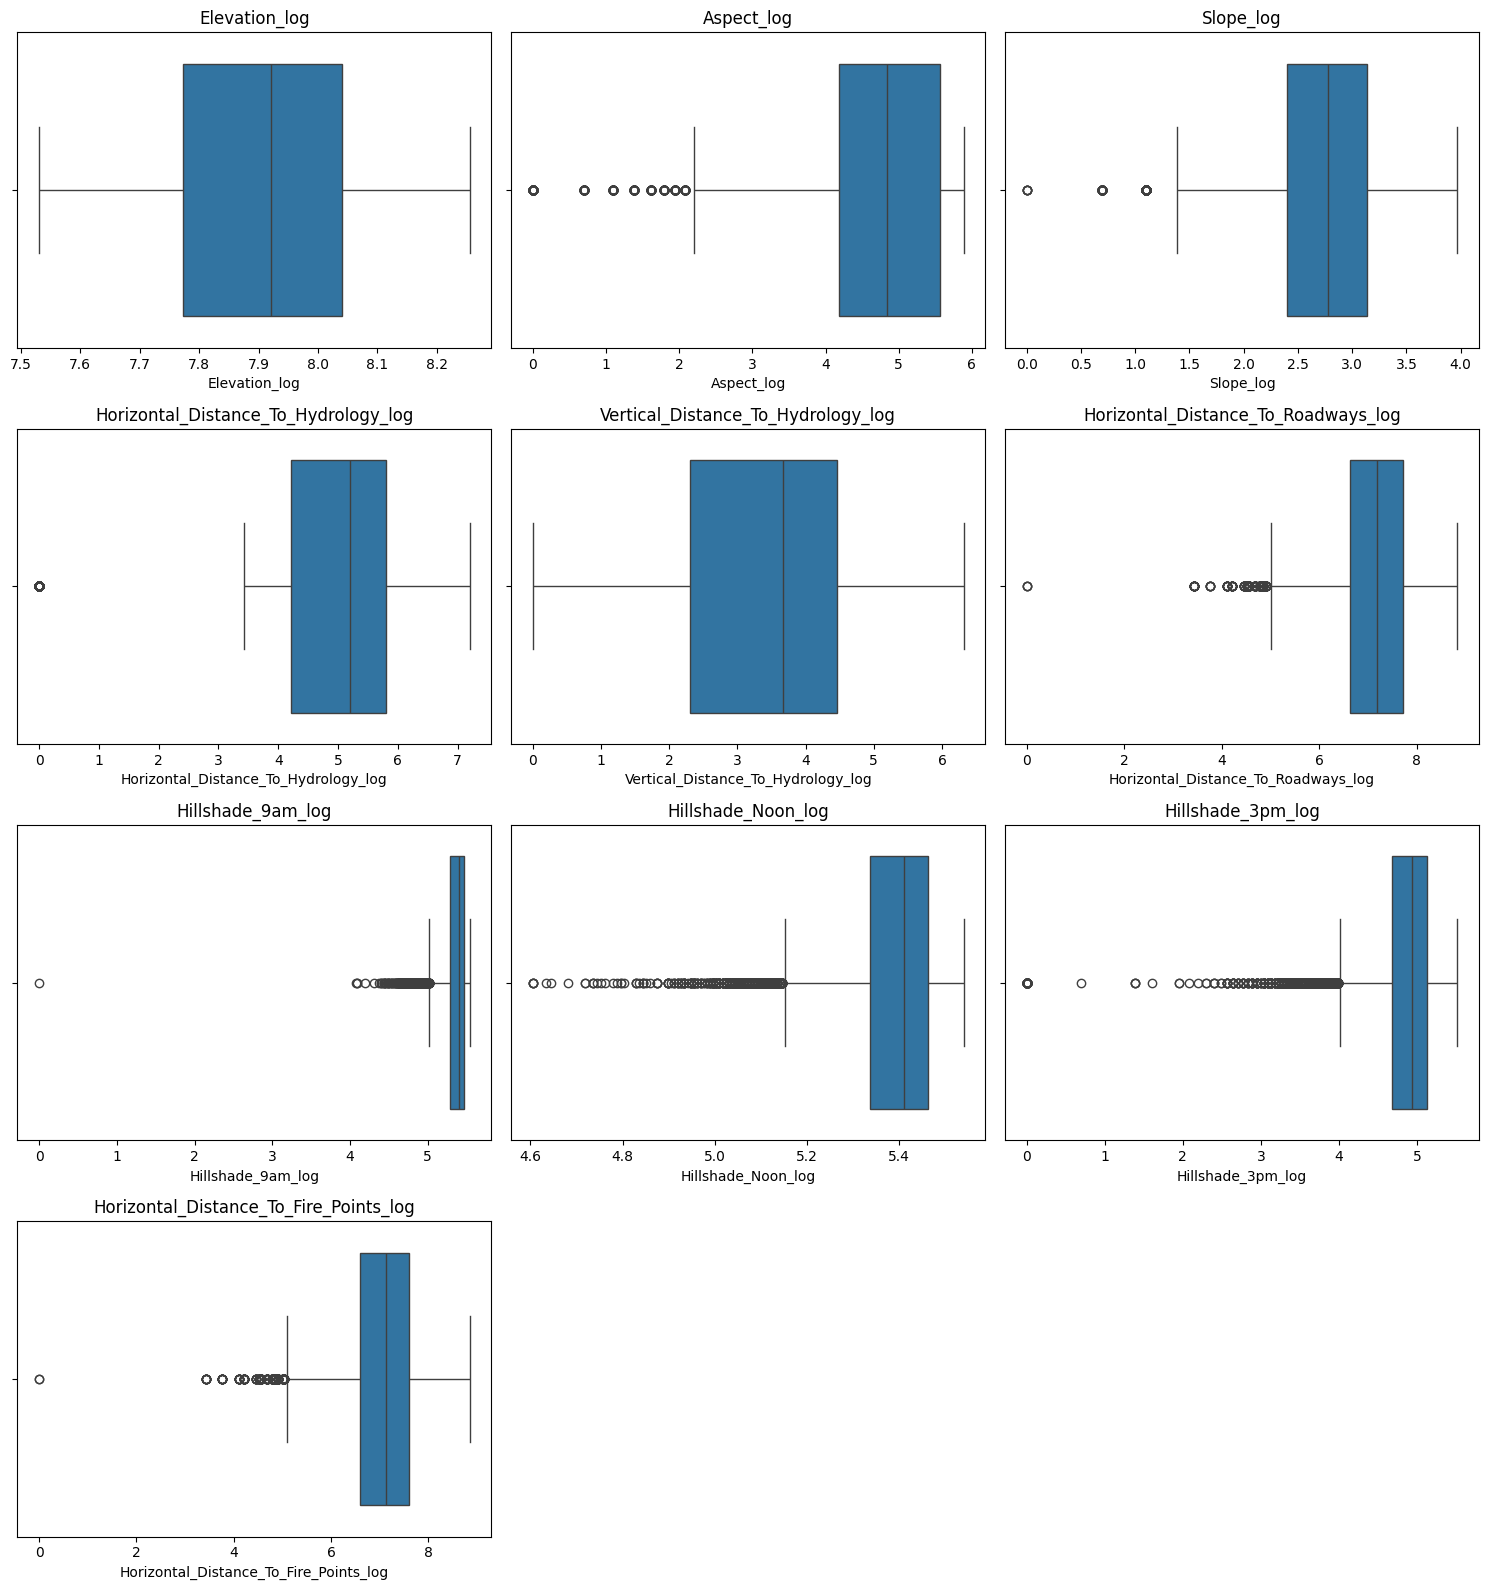

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of transformed features (with '_log')
transformed_features = [f + '_log' for f in continuous_features]

# Set the number of plots and configure the subplot grid
n_features = len(transformed_features)
cols = 3  # number of plots per row
rows = n_features // cols + (n_features % cols > 0)

plt.figure(figsize=(cols*5, rows*4))

for i, feature in enumerate(transformed_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df_log[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()


In [ ]:
# Assume df_log now has our log-transformed features along with the original ones.
# You can choose to use only the transformed features for modeling, or combine them with selected original features.

# For example, let's use only the transformed continuous features, along with the one-hot encoded soil and wilderness features.

# Identify the log-transformed continuous features
log_features = [f + '_log' for f in continuous_features]

# Identify the rest of the features that remain unchanged (like Wilderness and Soil Type features)
other_features = [col for col in df_log.columns if ('Soil_Type' in col or 'Wilderness_Area' in col)]
# Also include other original features if necessary (if you decide to keep some)

# Combine these features for modeling
selected_features = log_features + other_features

# Prepare the dataset for modeling
X_transformed = df_log[selected_features]
y_transformed = df_log['Cover_Type']

from sklearn.model_selection import train_test_split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_transformed, y_transformed, test_size=0.20, random_state=42, stratify=y_transformed
)

print("Training set shape:", X_train_log.shape)
print("Testing set shape:", X_test_log.shape)


Training set shape: (12096, 54)
Testing set shape: (3024, 54)


Since there are a lot of outliers that seem to be important for the better prediction on the testing model . we will go on with the models like random forest ,which can handle the outliers well. And then compare the results with ensemble learning models. The last will be to do cross validation and assess residuals.

In [ ]:
print(df.columns)


Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['Cover_Type', 'Id'])
y = df['Cover_Type']

# Perform an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (12096, 54)
Testing set shape: (3024, 54)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.8551587301587301

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.77      0.77       432
           2       0.78      0.65      0.71       432
           3       0.83      0.81      0.82       432
           4       0.93      0.97      0.95       432
           5       0.88      0.94      0.91       432
           6       0.83      0.88      0.85       432
           7       0.94      0.97      0.95       432

    accuracy                           0.86      3024
   macro avg       0.85      0.86      0.85      3024
weighted avg       0.85      0.86      0.85      3024



Hyper para meter tuning for random forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Optimized Random Forest Accuracy:", accuracy_best)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Optimized Random Forest Accuracy: 0.8568121693121693

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.77      0.78       432
           2       0.79      0.66      0.72       432
           3       0.83      0.79      0.81       432
           4       0.93      0.98      0.95       432
           5       0.88      0.95      0.91       432
           6       0.82      0.88      0.85       432
           7       0.94      0.97      0.95       432

    accuracy                           0.86      3024
   macro avg       0.85      0.86      0.85      3024
weighted avg       0.85      0.86      0.85      3024



In [ ]:
!pip install xgboost


In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Adjust y values: subtract 1 so that classes are 0 to 6
y_train_adj = y_train - 1
y_test_adj = y_test - 1

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, eval_metric='mlogloss', use_label_encoder=False, random_state=42)

# Now fit the XGBoost model with the adjusted labels
xgb_model.fit(X_train, y_train_adj)

# Make predictions
y_pred_xgb_adj = xgb_model.predict(X_test)

# Convert predictions back to original labels if needed
y_pred_xgb = y_pred_xgb_adj + 1

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:51:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.853505291005291

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.74      0.76       432
           2       0.75      0.63      0.69       432
           3       0.83      0.82      0.83       432
           4       0.96      0.97      0.97       432
           5       0.87      0.95      0.91       432
           6       0.82      0.88      0.85       432
           7       0.94      0.98      0.96       432

    accuracy                           0.85      3024
   macro avg       0.85      0.85      0.85      3024
weighted avg       0.85      0.85      0.85      3024



CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

# Use the best Random Forest model (or your XGBoost model) for cross-validation

cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())


Cross-validation scores: [0.85041322 0.85407193 0.86027284 0.85035138 0.86068623]
Average CV score: 0.855159122511522


Residual Analysis

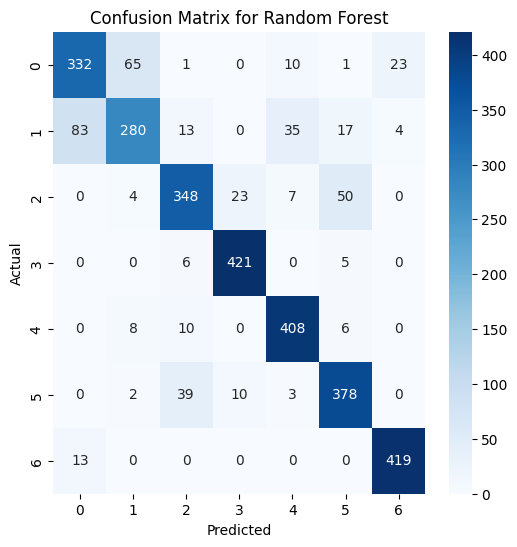

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for the Random Forest model
conf_matrix = confusion_matrix(y_test, rf_model.predict(X_test))

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

AFTER REGULARIZATION

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost with L2 regularization (reg_lambda)
xgb_model_l2 = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=8,      # Because our original classes are 1-7, we have 7 classes; we adjusted y by subtracting 1, so num_class=7 works too.
    eval_metric='mlogloss',
    random_state=42,
    reg_lambda=2.0    # Increase this value to increase L2 regularization strength.
)

# Assuming y_train and y_test have been adjusted: subtract 1 to convert to 0-indexed classes.
xgb_model_l2.fit(X_train, y_train - 1)

# Make predictions (and convert predictions back to original class labels by adding 1)
y_pred_xgb_l2 = xgb_model_l2.predict(X_test) + 1

# Evaluate the model
accuracy_l2 = accuracy_score(y_test, y_pred_xgb_l2)
print("XGBoost with L2 Regularization Accuracy:", accuracy_l2)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_l2))


XGBoost with L2 Regularization Accuracy: 0.84755291005291

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.74      0.75       432
           2       0.73      0.63      0.68       432
           3       0.83      0.81      0.82       432
           4       0.96      0.98      0.97       432
           5       0.87      0.95      0.91       432
           6       0.82      0.87      0.85       432
           7       0.94      0.97      0.95       432

    accuracy                           0.85      3024
   macro avg       0.84      0.85      0.84      3024
weighted avg       0.84      0.85      0.84      3024



In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the optimized Random Forest model (best_rf)
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())


Cross-validation scores: [0.85041322 0.85407193 0.86027284 0.85035138 0.86068623]
Average CV score: 0.855159122511522


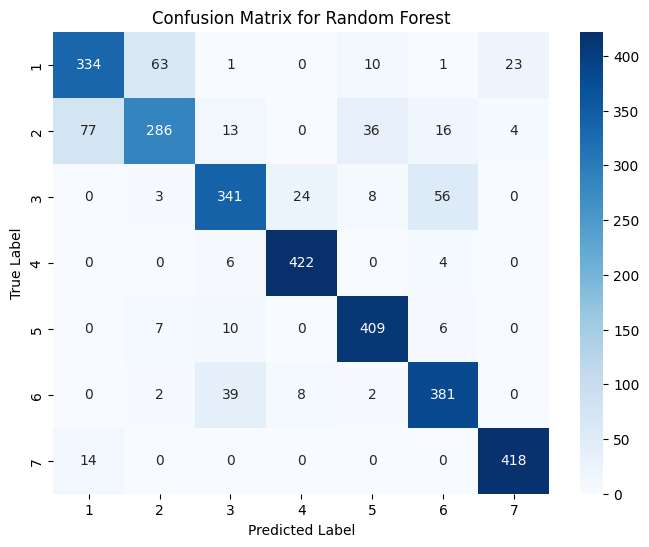

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions from the Random Forest model
y_pred_rf = best_rf.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


FEATURE IMPORTANCE MAP OF RANDOM FOREST TO ANALYSE THE MOST IMP FEATURES

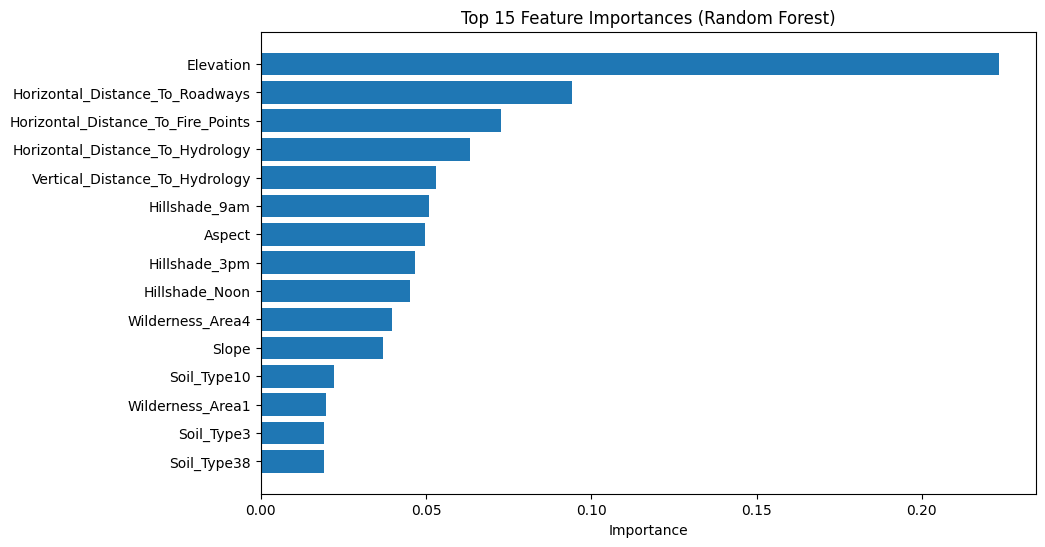

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances from the best Random Forest model
importances = best_rf.feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:15][::-1], importance_df['Importance'][:15][::-1])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.show()


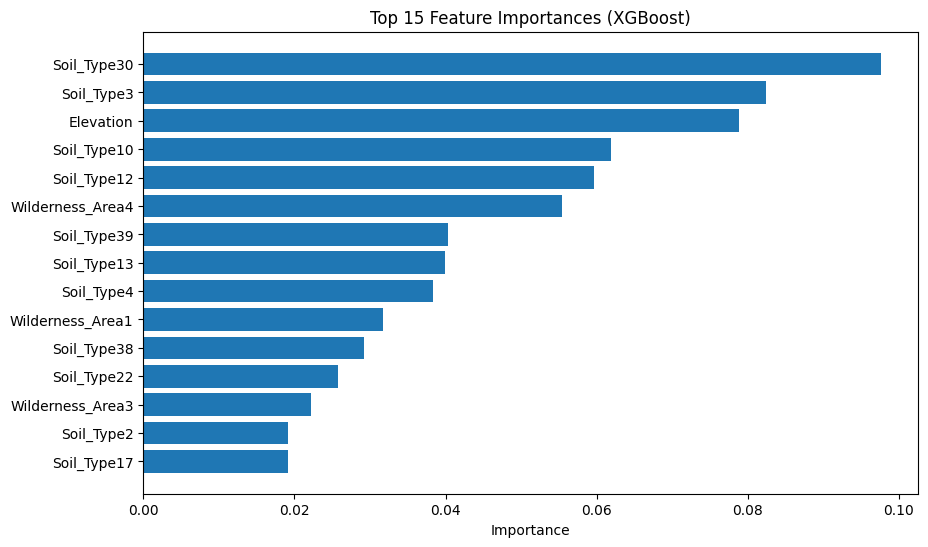

In [ ]:
# Extract feature importances from the XGBoost model
xgb_importances = xgb_model.feature_importances_
xgb_importance_df = pd.DataFrame({'Feature': features, 'Importance': xgb_importances})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 15 features from XGBoost
plt.figure(figsize=(10, 6))
plt.barh(xgb_importance_df['Feature'][:15][::-1], xgb_importance_df['Importance'][:15][::-1])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.show()


Voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
lgbm_clf = LGBMClassifier()

# Create a voting classifier (hard voting for majority voting)
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb_clf), ('rf', rf_clf), ('lgbm', lgbm_clf)],
    voting='hard'  # 'hard' uses majority voting, 'soft' uses probabilities
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict
y_pred = voting_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy: {accuracy:.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:54:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 12096, number of used features: 44
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
Voting Classifier Accuracy: 0.8618

Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.76      0.78       432
           2       0.77      0.66      0.71       432
           3       0.84      0.82      0.83   

Combining features

In [ ]:
# Create a combined soil feature: sum of all Soil_Type features
soil_features = [col for col in df.columns if 'Soil_Type' in col]
df['Soil_Sum'] = df[soil_features].sum(axis=1)

# Create an interaction feature: Elevation multiplied by Slope
df['Elevation_Slope'] = df['Elevation'] * df['Slope']

# Create a ratio feature: Horizontal Distance to Hydrology divided by (Vertical Distance to Hydrology + 1) to avoid division by zero
df['Hydrology_Ratio'] = df['Horizontal_Distance_To_Hydrology'] / (df['Vertical_Distance_To_Hydrology'] + 1)

# Check that new features are added
print(df[['Soil_Sum', 'Elevation_Slope', 'Hydrology_Ratio']].head())


   Soil_Sum  Elevation_Slope  Hydrology_Ratio
0         1             7788       258.000000
1         1             5180       -42.400000
2         1            25236         4.060606
3         1            50130         2.033613
4         1             5190              inf


In [ ]:
# Redefine the features (drop Id and Cover_Type for predictors)
X_new = df.drop(columns=['Id', 'Cover_Type'])
y_new = df['Cover_Type']

# Perform the 80-20 train-test split
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.20, random_state=42, stratify=y_new
)

print("New Training set shape:", X_train_new.shape)
print("New Testing set shape:", X_test_new.shape)


New Training set shape: (12096, 57)
New Testing set shape: (3024, 57)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


filename = '/content/train.csv'
df = pd.read_csv(filename)


# Create a combined soil feature: sum of all Soil_Type features
soil_features = [col for col in df.columns if 'Soil_Type' in col]
df['Soil_Sum'] = df[soil_features].sum(axis=1)

# Create an interaction feature: Elevation multiplied by Slope
df['Elevation_Slope'] = df['Elevation'] * df['Slope']

# Create a ratio feature: Horizontal Distance to Hydrology divided by (Vertical Distance to Hydrology + 1 + small_constant) to avoid division by zero or large values.
small_constant = 0.001
df['Hydrology_Ratio'] = df['Horizontal_Distance_To_Hydrology'] / (df['Vertical_Distance_To_Hydrology'] + 1 + small_constant)

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)


# Check that new features are added
print(df[['Soil_Sum', 'Elevation_Slope', 'Hydrology_Ratio']].head())

# Redefine the features (drop Id and Cover_Type for predictors)
X_new = df.drop(columns=['Id', 'Cover_Type'])
y_new = df['Cover_Type']


# Perform the 80-20 train-test split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.20, random_state=42, stratify=y_new
)

print("New Training set shape:", X_train_new.shape)
print("New Testing set shape:", X_test_new.shape)


# Initialize models again (you may reuse the same parameters as before)
xgb_clf_new = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, missing=np.nan) #added missing=np.nan
rf_clf_new = RandomForestClassifier(n_estimators=200, random_state=42)
lgbm_clf_new = LGBMClassifier(random_state=42)

# Create Voting Classifier (using 'hard' voting; later, you can experiment with 'soft')
voting_clf_new = VotingClassifier(
    estimators=[('xgb', xgb_clf_new), ('rf', rf_clf_new), ('lgbm', lgbm_clf_new)],
    voting='hard'
)

# Train the Voting Classifier on the new training set
voting_clf_new.fit(X_train_new, y_train_new)

# Predict on the new test set
y_pred_new = voting_clf_new.predict(X_test_new)

# Evaluate the new Voting Classifier model
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f'Voting Classifier Accuracy with New Features: {accuracy_new:.4f}')
print("\nClassification Report:\n", classification_report(y_test_new, y_pred_new))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_new, y_pred_new))

   Soil_Sum  Elevation_Slope  Hydrology_Ratio
0         1             7788       257.742258
1         1             5180       -42.408482
2         1            25236         4.060545
3         1            50130         2.033596
4         1             5190    153000.000000
New Training set shape: (12096, 57)
New Testing set shape: (3024, 57)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:54:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2672
[LightGBM] [Info] Number of data points in the train set: 12096, number of used features: 46
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
Voting Classifier Accuracy with New Features: 0.8532

Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.75      0.75       432
           2       0.75      0.64      0.69       432
           3       0.83     

removing some features

In [ ]:
# Create a new DataFrame with selected features:
# We'll keep all the original features plus our two engineered features: Soil_Sum and Elevation_Slope.
# We'll drop Hydrology_Ratio.
df_new = df.copy()

# Keep the engineered features: Soil_Sum and Elevation_Slope already exist, but drop Hydrology_Ratio if it exists
if 'Hydrology_Ratio' in df_new.columns:
    df_new = df_new.drop(columns=['Hydrology_Ratio'])

# Redefine features and target
X_new2 = df_new.drop(columns=['Id', 'Cover_Type'])
y_new2 = df_new['Cover_Type']

# Check the shape to ensure everything is as expected
print("Shape of new feature set:", X_new2.shape)


Shape of new feature set: (15120, 56)


In [ ]:
from sklearn.model_selection import train_test_split

X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(
    X_new2, y_new2, test_size=0.20, random_state=42, stratify=y_new2
)

print("New Training set shape:", X_train_new2.shape)
print("New Testing set shape:", X_test_new2.shape)


New Training set shape: (12096, 56)
New Testing set shape: (3024, 56)


In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the models
xgb_clf_new2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
rf_clf_new2 = RandomForestClassifier(n_estimators=200, random_state=42)
lgbm_clf_new2 = LGBMClassifier(random_state=42)

# Create a Voting Classifier (using hard voting)
voting_clf_new2 = VotingClassifier(
    estimators=[('xgb', xgb_clf_new2), ('rf', rf_clf_new2), ('lgbm', lgbm_clf_new2)],
    voting='hard'
)

# Train the Voting Classifier on the new training set
voting_clf_new2.fit(X_train_new2, y_train_new2)

# Make predictions on the test set
y_pred_new2 = voting_clf_new2.predict(X_test_new2)

# Evaluate the model
accuracy_new2 = accuracy_score(y_test_new2, y_pred_new2)
print(f'Voting Classifier Accuracy without Hydrology_Ratio: {accuracy_new2:.4f}')
print("\nClassification Report:\n", classification_report(y_test_new2, y_pred_new2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_new2, y_pred_new2))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:45:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2417
[LightGBM] [Info] Number of data points in the train set: 12096, number of used features: 45
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
Voting Classifier Accuracy without Hydrology_Ratio: 0.8588

Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.77      0.77       432
           2       0.77      0.64      0.70       432
           3       0.83      0.82      0.82       432
           4       0.96      0.9

# Result
Since the practices like:
combining features, removing features etc doesnt work so, till now the VOTING CLASSIFICATION method without any of these techniques ia the best.